# Facebook Message Analyzer

<b> Two Features For a Given Chat: </b>
<ul> 
    <li> Messages Sent Over the Course of a Day </li> 
    <li> Average Length of Words in Messages </li> 
</ul>

In [170]:
import os
import json
import numpy as np
import pylab as pl
import datetime
import pandas

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 10
MESSAGE_BOUND = 1000

In [171]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/messages/inbox/" + chat + "/message_1.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [160]:
chats = os.listdir(CURRENT_DIRECTORY + "/messages/inbox/")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_timeofday = {}
final_data_wordlength = {}
invalid_message_count = 0

In [161]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)
print('Finished processing chats...')

Analyzing 587 chats...
angieorzel_rvqlrmgmhw
BenjaminWilson__-I-0n22Cw
JoyWang_h6S99mC5vQ
advaymahajan_knau3fjitw
colettetermaat_yur0-c8fqg
facebookuser_ndt1cxlwqg
arnavbatta_jwvwzljocq
andrewkim_xdczsnnkoq
mirandaliu_rrejtlic-q
jerrykurkcu_1rcslc2bpw
flagship1920_zcu7etj7qq
dominiquelegyuv_7l3c_o7jmw
XXXXXXL_ttPxpNC3sA
matthewchen_et2ltycxiw
jasminecaro_dosj04ibgg
ericjeon_58tt6vubaq
hannahhyman_99_0yggi6g
kyleheng_nhruph85uw
laurenguest_bty2vxmmsw
swathykarthikeyan_p4bk1pcl9q
JoyceSun_5RgBlLnVzA
juliaseverance_yc_xm6j9ga
rajatmittal_r1lo3awuca
JenWu_EeDUfD_jgA
omarbolivar_5hnh3hqsaa
estherkoh_mvk6hxts6g
BenjaminHung_IPOW_TMkog
jennychu_2cdregq_eq
baichengyou_hajisn7bgq
miguelmoises_egadj1t-xa
ryenamoradiaz__5ekramdwa
tusharshahani_taaa2wdg1q
bushrashams_5jharpenxq
laurenyang_w9vr6ip82q
visheshamin_jsrdejjldw
victorrperez_fvrdltfqdg
BrunchSquad_ly6MZc0Xcw
jennaburnett_-2p8n_melq
williamchen_ebx2b1nq6q
phoebefu_di3pdanpbw
jennykim_xqoozu5o9q
noahkim_ab1dfe0arw
NaokiKihata_AgCqjtXZOg
ka

kaileyhenson_6sq2fdycka
calebju_s8z9a2imsg
sharbikdutta_syedkav1zg
AsherNoel_on31291wwA
amideastnsliyharvard_epzond30fq
katiealerte_vv-o-uyuhw
akhilayalvigi_anwm5in_dg
kelseywu_t-wct8z24a
kushalkadakia_2n4cezryvw
ishantaparia_fywb9bkhbw
PrayagBhakar__iffBo8X7Q
mattzimolzak_9gda3dxj7w
albertzhu_uffoaylrla
stefanieportillo_m8okpvrw2q
nabeelasyed_8awbpammua
fionafreeman_ztpec4abza
benjaminbarulli_5wdwt2mccw
jerrymoon_kft7l4uotg
BenjaminKan_KTEYGCseWw
MayaMenon_00DqRoUqIg
SamanthaLee_OuqshmoBQQ
jongwomenweightloss_ro9sqfk0sg
PatrickYoon_P6XZbd_Y2g
fremdareatafers_vqrnri1n9q
kylemorimoto_5bdvtpjmhg
shreyaghosh_zon_isrwxw
sanasyed_-iaghj1v2a
henryaustin_1nnvhyrlnw
chasebrownstein_u4ffiemoaa
OnlineGoogleCSSI_NunObJKYfQ
jayseo_4tykzjpqrg
emilysheng_dmac8ackbq
rishikasuraparaju_wj0bnh2btw
navinyuvaraj_ezlue5vndw
isabellasaccone_cmc99cd6tw
debateexec1718_bb004oybcq
actualstuco_-26smjwaja
AngelaShiue_vrP_luta1g
jaimechen_ouc0wvdhzq
andrewsoonmyunghwang_dsxxyojfrw
christinecai_rsmjego4lg
quanlee_g

In [162]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    person_to_timeofday = {}
    person_to_wordlength = {}

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            person_to_timeofday[name] = person_to_timeofday.get(name, [])
            person_to_timeofday[name].append(datetime.datetime.fromtimestamp(time/1000.0).time())

            person_to_wordlength[name] = person_to_wordlength.get(name, [])
            person_to_wordlength[name].append(len(message_content) / len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_timeofday[i] = person_to_timeofday
    final_data_wordlength[i] = person_to_wordlength

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

Found 1051 invalid messages...
Found 115 chats with 10 messages or more


In [163]:
def plot_histogram_timeday(chat_number):
    person_to_timeofday = final_data_timeofday[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Day')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_timeofday):
        plotted_data = person_to_timeofday[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()
    
def plot1(chat_number):
    plot_histogram_timeday(chat_number)

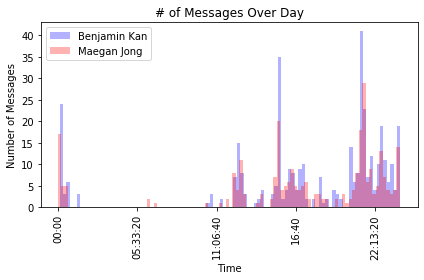

In [152]:
plot1(5)

In [168]:
def plot_histogram_wordlength(chat_number):
    temp = {}
    for person in final_data_wordlength[chat_number]:
        temp[person] = np.average(final_data_wordlength[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'b', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Number of Letters in Words Used in Messages')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_histogram_wordlength(chat_number)

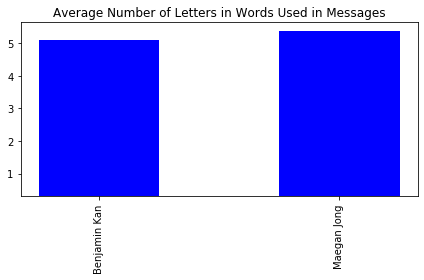

In [169]:
plot(5)